> This notebook follows the [fastai style conventions](https://docs.fast.ai/dev/style.html#style-guide).

> :warning: **If you are using macOS**: This notebook can not be trained on
> macOS. If you try to run all, the notebook will automatically stop
> execution at the training stage, and transfer execution to a remote Kaggle
> GPU.

In [1]:
# TODO: Move imports to where they are needed

## Setup

In [1]:
from platform import system
from zipfile import ZipFile

import torch.nn.functional
from fastai.imports import *

/home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
try:
    from fastkaggle import *
except ModuleNotFoundError:
    ! pip install fastkaggle
    from fastkaggle import *

In [3]:
environment = system()
environment, iskaggle

('Linux', '')

In [4]:
data_path = setup_comp('feedback-prize-english-language-learning')
if not iskaggle: ZipFile(f'{data_path}.zip').extractall(data_path)

ApiException: (401)
Reason: Unauthorized
HTTP response headers: HTTPHeaderDict({'Content-Length': '0', 'Date': 'Fri, 11 Nov 2022 17:25:29 GMT', 'Access-Control-Allow-Credentials': 'true', 'Set-Cookie': 'ka_sessionid=38ba61144288759b712fa01e9ca29d34; max-age=2626560; path=/, GCLB=CJj5iq6L_vyu6gE; path=/; HttpOnly', 'Turbolinks-Location': 'https://www.kaggle.com/api/v1/competitions/data/download-all/feedback-prize-english-language-learning', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Content-Security-Policy': "object-src 'none'; script-src 'nonce-PcTDwH2PjqwcM+aBE9cmNw==' 'report-sample' 'unsafe-inline' 'unsafe-eval' 'strict-dynamic' https: http:; frame-src 'self' https://www.kaggleusercontent.com https://www.youtube.com/embed/ https://polygraph-cool.github.io https://www.google.com/recaptcha/ https://form.jotform.com https://submit.jotform.us https://submit.jotformpro.com https://submit.jotform.com https://www.docdroid.com https://www.docdroid.net https://kaggle-static.storage.googleapis.com https://kaggle-static-staging.storage.googleapis.com https://kkb-dev.jupyter-proxy.kaggle.net https://kkb-staging.jupyter-proxy.kaggle.net https://kkb-production.jupyter-proxy.kaggle.net https://kkb-dev.firebaseapp.com https://kkb-staging.firebaseapp.com https://kkb-production.firebaseapp.com https://kaggle-metastore-test.firebaseapp.com https://kaggle-metastore.firebaseapp.com https://apis.google.com https://content-sheets.googleapis.com/ https://accounts.google.com/ https://storage.googleapis.com https://docs.google.com https://drive.google.com https://calendar.google.com/; base-uri 'none'; report-uri https://csp.withgoogle.com/csp/kaggle/20201130;", 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})


## Data Exploration

### Training Data

In [5]:
train_df = pd.read_csv("/home/aswin/data/Feedback-Prize-English-Language-Learning/train.csv"); train_df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and st...",3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it do the best on you no matter what is happening it can change your mind. sometimes you need to wake up and look what is around you because problems are the best way to change what you want to change along time ago. A\n\nproblem is a change for you because it can make you see different and help you to understand how tings wok.\n\nFirst of all it can make you see different then the others. For example i remember that when i came to the United States i think that nothing was going to change me because i think that nothing was going to change me bec...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Because many students have a C average. So that means that they cant go out for sports or other activities they want to do bad. That's like taking everything they have. What if kids want to become good at something, but now they cant because of that school policy. If they have a C average they should still be able to go out for sports or activities. A C average isn't that bad, its higher then a D average. If the school police was if you have a D average of lower they shouldn't do sports or activities....",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,"The best time in life is when you become yourself. I agree that the greatest accomplishment, is when you be yourself in a world that constantly trying to make you something else. Because you make your own choices, you become more happy, and you respect others.\n\nFirst, you make your own choices by being yourself. Becoming yourself means that you should be able to make your own choices and not be shy or afraid of what you're doing. Because you're defining yourself by doing those things that you want. Some people follow others, therefore, they don't make their own choices. People are afraid...",4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other people can change people to become better persons you can have an impact of kindess with a homeles that can change his life or with some who needed they are going to know you are a nice person if you are a nice person everywhere you go people is going to like your personality so you have to be a nice person with others like a old women triying to cross the road thats a impact of kindness when you do that you feel a greate person you can change people in the way they think by helping others treating nice other people give them some advice when you s...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,"I believe using cellphones in class for education us only is good/bad idea for students.\n\nI believe some students learn easer on technolegy then paper ad pencil, but i also believe cellphone could be use for bad use such as students using for games and apps, texting etc ,\n\nI believe cellphones could drop grades. i've been through it all and seen it all, im a student myself and sometimes when our teachers allowes us to use our cellphones i take the chance to look through my texts and i would see my classmates do the same, but then we have moments where we reallly need to serach up infor...",2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, student

Some characters to consider: \n and \r.

In [6]:
# Describing the essays does not seem to be useful.
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Most essays score average (~3.0) across all categories.

In [8]:
train_df['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [9]:
train_df['full_text'][3910]

"Do you think that failure is the main thing for people consist on their goal's and success without lose their enthusiasm?\n\nI agree with the important role that failure play in the pursuit of success in life because, I think failure is the main key to people reach their goal's because they need to have the idea that after failure came the success, secondly they need to be positive and have in mind what they want and how they want to reach their success in life, and last they have to be prepared for failure, and they have to be prepared to confront the failure because they need to keep in mind that not everything is going to be in the way they want, but at the same time they always need to have in mind that everything is possible with effort.\n\nFirst, people need to have the idea that after failure came the success, because everything happens for a reason and if something goes wrong for certain reason in the moment when they try to success they need to accept things, and keep trying.

#### Training Scores Visualized

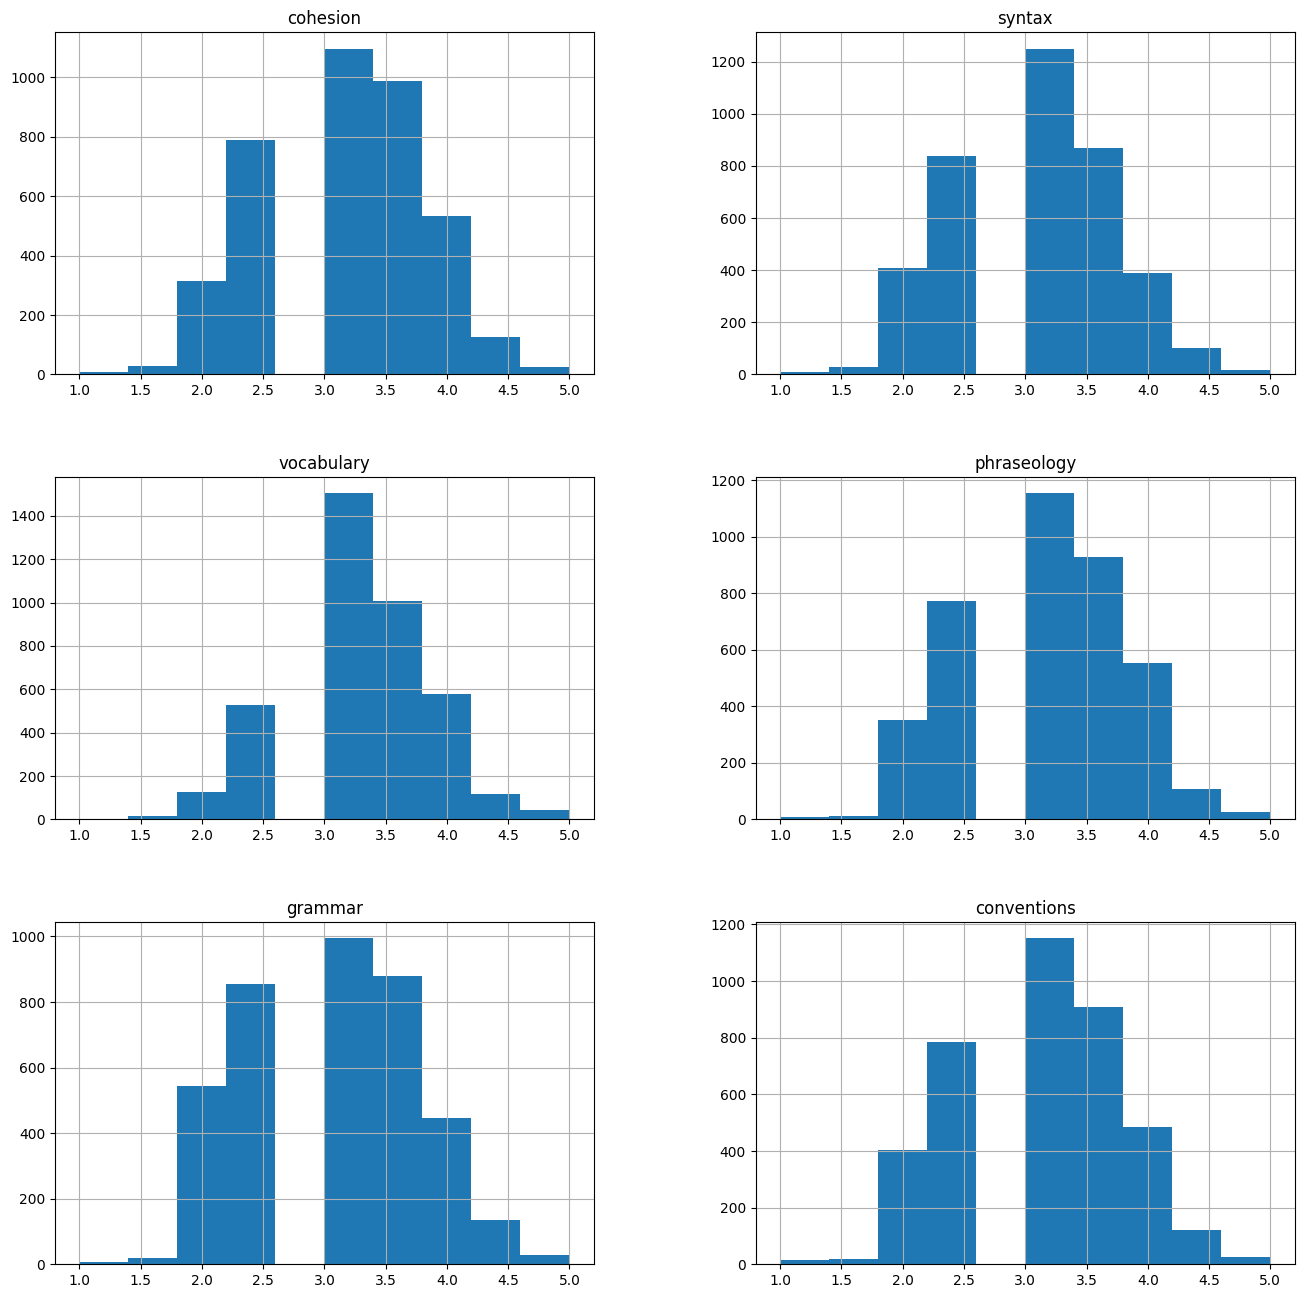

In [7]:
train_df.hist(figsize=(16, 16));

These histograms all follow a similar trend, with most essays being average with scores in the 3.0 – 3.5 range across all categories.

The number of essays that score 4.6-5.0 in all categories is less than 100, with those scoring 1.0 – 1.4 being even fewer.

Interestingly enough, no essays gained a score between 2.6 and 3.0 in any of the categories.

### Testing Data

In [11]:
test_df = pd.read_csv(data_path/'test.csv'); test_df

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their is always going to be good people to help you and try to explane the job you need to get done in life you were not born with knowing everything. Life is bassicly about learing new things every single day even though without experience because life is simple and we must live happy and around with the people we love. When a person thinks they know everything in life they dont do good because they trying to make the other person less then others you must be kind to those the dont have experience because you may not know some day you will go to a ...
1,000BAD50D026,"Do you think students would benefit from being able attend classes from home?\n\nYes! its benefit for student who attend classes from home. Because some student want to attend classes from home because they thinks it's very important for them . And they think they can learned fast, and understand than they student who attend classes from school. For example my friend told me that she's attand classes from home it's good for her, because they is some subject she didn't understand when she attend classes from school but when she attend the home classes she good for that subject. she like sci..."
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonderful how much we can get done when we are always doing something,I agree to this statement. Some people say that it is always better to always be doing something than to be inactive and so nothing at all to chase after on your dreams. always doing something lets you feel a sense of accomplishment,it makes you want to strive to do even more than what you did,you can also learn something along the way.\n\nThe first reason that always doing is better than doing nothing is that it gives you a sense of you accomplishing something. when you finish a ..."


## Data Processing

## Prototyping Functions

In [8]:
import logging, warnings

from datasets import Dataset, DatasetDict
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

comet_ml is installed but `COMET_API_KEY` is not set.


### Disable Huggingface Warnings

In [9]:
warnings.simplefilter('ignore')
logging.disable((logging.WARNING))

### Tokenizer

In [10]:
model_nm = 'microsoft/deberta-v3-xsmall'
tokz = AutoTokenizer.from_pretrained(model_nm)

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/578 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

In [11]:
def tok_doc(doc):
    return tokz(doc['full_text'])

### Dataset Dictionary

No need to create individual dataframes since the function below will remove the other columns.

In [12]:
idxs = np.array(train_df.index)

def create_dds(df, col_name):
    ds = Dataset.from_pandas(df).rename_column(col_name, 'label')
    cols_to_remove = list(train_df.columns)
    cols_to_remove.remove(col_name)
    tokz_ds = ds.map(tok_doc, batched=True, remove_columns=cols_to_remove)

    return DatasetDict({
        'train': tokz_ds.select(idxs[: round(len(idxs) * 0.8)]),
        'valid': tokz_ds.select(idxs[  round(len(idxs) * 0.8) :])
    })

In [13]:
dds = create_dds(train_df, 'cohesion'); dds

  0%|          | 0/4 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3129
    })
    valid: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 782
    })
})

In [ ]:
dds['valid'][2]

### Metric Function

In [14]:
def rmse(valid_pred):
    return torch.nn.functional.mse_loss(*valid_pred).sqrt()

### Hyperparameters

In [15]:
lr, bs, wd, epochs = 8e-5, 1, 0.01, 4

### Trainer

In [16]:
def get_model():
    return AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

def create_trainer(dds, model=None):
    if model is None: model = get_model()

    args = TrainingArguments(
        'outputs',
        learning_rate=lr,
        warmup_ratio=0.1,
        lr_scheduler_type='cosine',
        fp16=True,
        evaluation_strategy='epoch',
        per_device_eval_batch_size=bs,
        per_gpu_eval_batch_size=bs,
        num_train_epochs=epochs,
        weight_decay=wd,
        report_to='none'
    )

    return Trainer(
        model,
        args,
        train_dataset=dds['train'],
        eval_dataset=dds['valid'],
        tokenizer=tokz,
        compute_metrics=rmse
    )

## Test Run (Cohesion)

### Use Kaggle remotely if on Mac

In [18]:
environment

'Linux'

In [19]:
if environment == 'Linux':
    nb_meta(
        user='apyakurel',
        id='apyakurel/push-feedbackComp',
        title='[PUSH] FeedbackComp',
        file='the_notebook.ipynb',
        competition='feedback-prize-english-language-learning',
        private=True,
        gpu=True
    )

    push_notebook(
        user='apyakurel',
        id='apyakurel/push-feedbackComp',
        title='[PUSH] FeedbackComp',
        file='the_notebook.ipynb',
        competition='feedback-prize-english-language-learning',
        private=True,
        gpu=True
    )

Your kernel title does not resolve to the specified id. This may result in surprising behavior. We suggest making your title something that resolves to the specified id. See https://en.wikipedia.org/wiki/Clean_URL#Slug for more information on how slugs are determined.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_17716/3440157884.py:12 in <module>                                                │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_17716/3440157884.py'                        │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/fastkaggle/core.py:73 in             │
│ push_notebook                                                                                    │
│                                                                                                  │
│    70 │   path.mkdir(exist_ok=True, parents=True)                                                │
│    71 │   with open(path/nm, 'w') as f: json.dump(meta, f, indent=2)                             │
│    72 │   api = import_kaggle()                                                                  │
│ ❱  73 │   api.kernels_push_cli(str(path))                                                        │
│    74                                                                                            │
│    75 # %% ../00_core.ipynb 16                                                                   │
│    76 def check_ds_exists(dataset_slug # Dataset slug (ie "zillow/zecon")                        │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py:19 │
│ 07 in kernels_push_cli                                                                           │
│                                                                                                  │
│   1904 │   │   """ client wrapper for kernels_push, with same arguments.                         │
│   1905 │   │   """                                                                               │
│   1906 │   │   folder = folder or os.getcwd()                                                    │
│ ❱ 1907 │   │   result = self.kernels_push(folder)                                                │
│   1908 │   │                                                                                     │
│   1909 │   │   if result is None:                                                                │
│   1910 │   │   │   print('Kernel push error: see previous output')                               │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py:18 │
│ 99 in kernels_push                                                                               │
│                                                                                                  │
│   1896 │   │                                                                                     │
│   1897 │   │   result = KernelPushResponse(                                                      │
│   1898 │   │   │   self.process_response(                                                        │
│ ❱ 1899 │   │   │   │   self.kernel_push_with_http_info(                                          │
│   1900 │   │   │   │   │   kernel_push_request=kernel_push_request)))                            │
│   1901 │   │   return result                                                                     │
│   1902                                                                                           │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/kaggle/api/kaggle_api.py:2423 in     │
│ kernel_push_with_http_info                                 

### Warning

In [20]:
class StopExecution(Exception):
    def _render_traceback_(self):
        return [
            "The training portion of this notebook can not be run on a Mac. Instead, this notebook is now being executed remotely on Kaggle. This notebook "
            "will not execute further locally."
        ]

In [21]:
if environment == 'Linux':
    raise StopExecution

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_17716/1618517487.py:2 in <module>                                                 │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_17716/1618517487.py'                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
StopExecution

### Create DDS

In [22]:
dds = create_dds(train_df, 'cohesion'); dds

  0%|          | 0/4 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3129
    })
    valid: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 782
    })
})

### Create Trainer

In [23]:
trainer = create_trainer(dds)

Downloading:   0%|          | 0.00/241M [00:00<?, ?B/s]

### Train Trainer

In [24]:
trainer.train()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_17716/4032920361.py:1 in <module>                                                 │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_17716/4032920361.py'                        │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/transformers/trainer.py:1521 in      │
│ train                                                                                            │
│                                                                                                  │
│   1518 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1519 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1520 │   │   )                                                                                 │
│ ❱ 1521 │   │   return inner_training_loop(                                                       │
│   1522 │   │   │   args=args,                                                                    │
│   1523 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1524 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/transformers/trainer.py:1763 in      │
│ _inner_training_loop                                                                             │
│                                                                                                  │
│   1760 │   │   │   │   │   with model.no_sync():                                                 │
│   1761 │   │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                  │
│   1762 │   │   │   │   else:                                                                     │
│ ❱ 1763 │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                      │
│   1764 │   │   │   │                                                                             │
│   1765 │   │   │   │   if (                                                                      │
│   1766 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/transformers/trainer.py:2499 in      │
│ training_step                                                                                    │
│                                                                                                  │
│   2496 │   │   │   return loss_mb.reduce_mean().detach().to(self.args.device)                    │
│   2497 │   │                                                                                     │
│   2498 │   │   with self.compute_loss_context_manager():                                         │
│ ❱ 2499 │   │   │   loss = self.compute_loss(model, inputs)                                       │
│   2500 │   │                                                                                     │
│   2501 │   │   if self.args.n_gpu > 1:                                                           │
│   2502 │   │   │   loss = loss.mean()  # mean() to average on multi-gpu parallel training        │
│                                                                                                  │
│ /home/aswin/anaconda3/envs/fast/lib/python3.9/site-packages/transformers/trainer.py:2531 in      │
│ compute_loss                                               